In [1]:
import copy
import glob
import os
import shutil
import time

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset

data_path = "C:/chungnam_chatbot/pytorch/data/catanddog/train"

transform = transforms.Compose(
    [
        transforms.Resize([256, 256]),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)

train_dataset = torchvision.datasets.ImageFolder(
    data_path,
    transform=transform,
)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)


print(len(train_dataset))

# samples, labels = train_loader._get_iterator()._next_data()
# classes = {0: "cat", 1: "dog"}
# fig = plt.figure(figsize=(16, 24))
# for i in range(24):
#     fig.add_subplot(4, 6, i + 1)
#     plt.title(classes[labels[i].item()])
#     plt.axis("off")
#     plt.imshow(np.transpose(samples[i].numpy(), (1, 2, 0)))
# plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)
# plt.show()

resnet18 = models.resnet18(pretrained=True)


def set_parameter_requires_grad(model, feature_extracting=True):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False


set_parameter_requires_grad(resnet18)
resnet18.fc = nn.Linear(512, 2)

for name, param in resnet18.named_parameters():
    print(name)
print("requires_grad 가 True 인 layer:-----------")
for name, param in resnet18.named_parameters():
    if param.requires_grad:
        print(name)

model = models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = torch.nn.Linear(512, 2)
for param in model.fc.parameters():
    param.requires_grad = True

optimizer = torch.optim.Adam(model.fc.parameters())
cost = torch.nn.CrossEntropyLoss()
print(model)

385
conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.weight
layer2.1.bn2.weight
layer2.1.bn2.bias
layer3.0.conv1.weight
layer3.0.bn1.weight
layer3.0.bn1.bias
layer3.0.conv2.weight
layer3.0.bn2.weight
layer3.0.bn2.bias
layer3.0.downsample.0.weight
layer3.0.downsample.1.weight
layer3.0.downsample.1.bias
layer3.1.conv1.weight
layer3.1.bn1.weight
layer3.1.bn1.bias
layer3.1.conv2.weight
layer3.1.bn2.weight
layer3.1.bn2.bias
layer4.0.conv1.weight
layer4.0.bn1.weight
layer4.0.bn1.bias
layer4.0.conv

c:\ProgramData\Anaconda3\envs\pytorch\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\pytorch\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=13, is_train=True):
    since = time.time()
    acc_history =[]
    loss_history=[]
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs-1}')
        # print('----------')
        print('-' * 10)
        running_loss = 0.0
        running_corrects = 0
        
        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)
            model.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(dataloaders.dataset)
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)
        
        print(f'Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        
        if epoch_acc > best_acc:
            best_acc = epoch_acc
        
        acc_history.append(epoch_acc.item())
        loss_history.append(epoch_loss)
        torch.save(model.state_dict(), os.path.join(data_path, '{0:0=2d}.pth'.format(epoch)))
        print()
    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best Acc: {best_acc:4f}')
    return acc_history, loss_history

In [6]:
params_to_update = []
for name, param in resnet18.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print('\t', name)

optimizer = optim.Adam(params_to_update)

	 fc.weight
	 fc.bias


In [7]:

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
train_acc_hist, train_loss_hist = train_model(resnet18, train_loader, criterion, optimizer, device)

Epoch 0/12
----------
Loss: 0.3450 Acc: 0.8597

Epoch 1/12
----------
Loss: 0.2932 Acc: 0.8701

Epoch 2/12
----------
Loss: 0.2656 Acc: 0.8909

Epoch 3/12
----------
Loss: 0.2428 Acc: 0.9039

Epoch 4/12
----------
Loss: 0.2440 Acc: 0.8753

Epoch 5/12
----------
Loss: 0.2010 Acc: 0.9273

Epoch 6/12
----------
Loss: 0.2348 Acc: 0.8935

Epoch 7/12
----------
Loss: 0.1909 Acc: 0.9195

Epoch 8/12
----------
Loss: 0.2081 Acc: 0.9013

Epoch 9/12
----------
Loss: 0.2009 Acc: 0.9013

Epoch 10/12
----------
Loss: 0.1517 Acc: 0.9481

Epoch 11/12
----------
Loss: 0.1950 Acc: 0.9013

Epoch 12/12
----------
Loss: 0.2273 Acc: 0.8961

Training complete in 0m 33s
Best Acc: 0.948052


In [8]:
test_path = "C:/chungnam_chatbot/pytorch/data/catanddog/test"

transform = transforms.Compose(
    [
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ]
)
test_dataset = torchvision.datasets.ImageFolder(root=test_path, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, num_workers=1, shuffle=True)

print(len(test_dataset))


98


In [15]:
def eval_model(model, dataloaders, device):
    since = time.time()
    acc_history =[]
    best_acc = 0.0
    
    saved_models = glob.glob( "C:/chungnam_chatbot/pytorch/data/catanddog/train/" + '*.pth')
    saved_models.sort()
    print('saved_model', saved_models)
    
    for model_path in saved_models:
        print('Loading model', model_path)
        
        model.load_state_dict(torch.load(model_path))
        model.eval()
        model.to(device)
        running_corrects = 0
        
        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            with torch.no_grad():
                outputs = model(inputs)
            
            _, preds = torch.max(outputs.data, 1)
            preds[preds >= 0.5] = 1
            preds[preds < 0.5] = 0
            running_corrects += preds.cpu().eq(labels.cpu()).int().sum()
            
        epoch_acc = running_corrects.double()/len(dataloaders.dataset)
        print(f'Acc: {epoch_acc:.4f}')
        if epoch_acc > best_acc:
            best_acc = epoch_acc
        acc_history.append(epoch_acc.item())
        print()
        
    time_elapesed = time.time() - since
    print(f'Validation complete in {time_elapesed//60:.0f}m {time_elapesed%60:.0f}s')
    print(f'Best Acc: {best_acc:4f}')
    return acc_history


In [16]:
val_acc_list = eval_model(resnet18, test_loader, device)

saved_model ['C:/chungnam_chatbot/pytorch/data/catanddog/train\\00.pth', 'C:/chungnam_chatbot/pytorch/data/catanddog/train\\01.pth', 'C:/chungnam_chatbot/pytorch/data/catanddog/train\\02.pth', 'C:/chungnam_chatbot/pytorch/data/catanddog/train\\03.pth', 'C:/chungnam_chatbot/pytorch/data/catanddog/train\\04.pth', 'C:/chungnam_chatbot/pytorch/data/catanddog/train\\05.pth', 'C:/chungnam_chatbot/pytorch/data/catanddog/train\\06.pth', 'C:/chungnam_chatbot/pytorch/data/catanddog/train\\07.pth', 'C:/chungnam_chatbot/pytorch/data/catanddog/train\\08.pth', 'C:/chungnam_chatbot/pytorch/data/catanddog/train\\09.pth', 'C:/chungnam_chatbot/pytorch/data/catanddog/train\\10.pth', 'C:/chungnam_chatbot/pytorch/data/catanddog/train\\11.pth', 'C:/chungnam_chatbot/pytorch/data/catanddog/train\\12.pth']
Loading model C:/chungnam_chatbot/pytorch/data/catanddog/train\00.pth
Acc: 0.9286

Loading model C:/chungnam_chatbot/pytorch/data/catanddog/train\01.pth
Acc: 0.9286

Loading model C:/chungnam_chatbot/pytorch

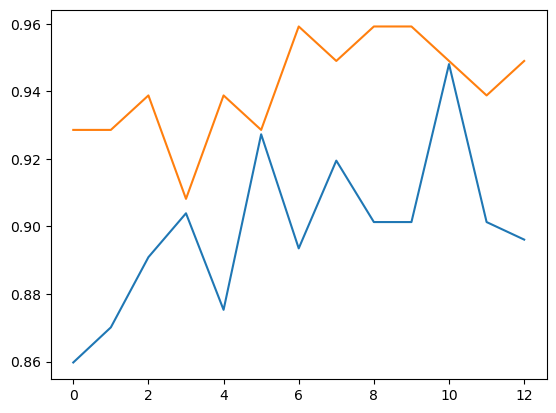

In [19]:
plt.plot(train_acc_hist) # 파란색
plt.plot(val_acc_list) # 주황색
plt.show()

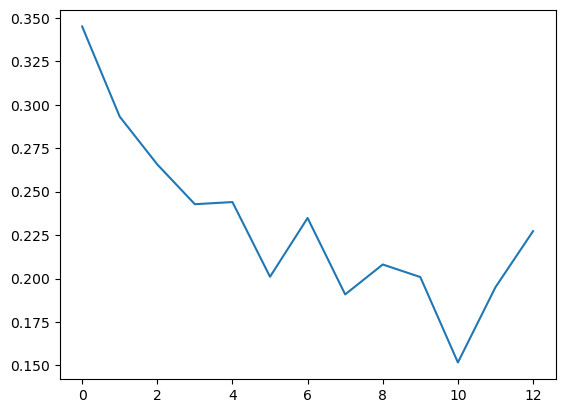

In [20]:
plt.plot(train_loss_hist)
plt.show()

In [24]:
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1,2,0)
    image = image * (np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5)))
    image = image.clip(0,1)
    return image

tensor([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0])


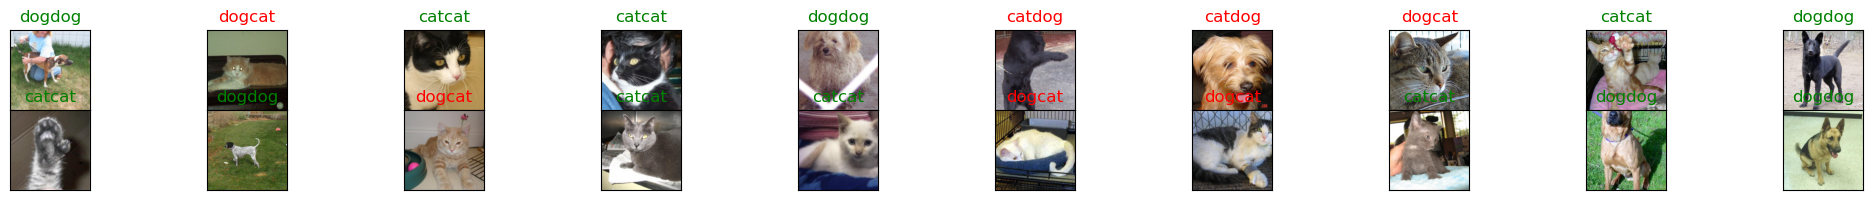

In [29]:
classes = {0:'cat', 1:'dog'}

dataiter = test_loader._get_iterator()
images, labels = dataiter._next_data()
output = model(images)
_, preds = torch.max(output, 1)

print(preds)

fig = plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title(f"{classes[preds[idx].item()]}{classes[labels[idx].item()]}", color=("green" if preds[idx]==labels[idx] else "red"))
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)
plt.show()